https://www.kaggle.com/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert

https://github.com/emmanuellaanggi/disaster_tweet_sentiment/blob/master/(Medium)_Text_Classification_Disaster_Tweet_.ipynb

In [1]:
!pip install -q -U trax
import trax

     |████████████████████████████████| 471kB 23.6MB/s 
     |████████████████████████████████| 174kB 54.9MB/s 
     |████████████████████████████████| 2.6MB 54.5MB/s 
     |████████████████████████████████| 3.7MB 54.7MB/s 
     |████████████████████████████████| 1.1MB 42.6MB/s 
     |████████████████████████████████| 348kB 59.1MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 1.4MB 51.9MB/s 
     |████████████████████████████████| 2.9MB 38.5MB/s 
     |████████████████████████████████| 890kB 51.4MB/s 


In [2]:
! wget https://raw.githubusercontent.com/muthu1698/Real-or-Not-NLP-with-Disaster-Tweets/master/train.csv
! wget https://raw.githubusercontent.com/muthu1698/Real-or-Not-NLP-with-Disaster-Tweets/master/test.csv

--2020-12-03 02:26:25--  https://raw.githubusercontent.com/muthu1698/Real-or-Not-NLP-with-Disaster-Tweets/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987712 (965K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 964.56K  --.-KB/s    in 0.02s   

2020-12-03 02:26:25 (39.9 MB/s) - ‘train.csv’ saved [987712/987712]

--2020-12-03 02:26:25--  https://raw.githubusercontent.com/muthu1698/Real-or-Not-NLP-with-Disaster-Tweets/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4207

In [3]:
# fasttext
# ! wget "https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip"
# ! unzip crawl-300d-2M.vec.zip

# glove embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip

--2020-12-03 02:26:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-03 02:26:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-03 02:26:27--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [4]:
import numpy as np
from trax.fastmath import numpy as fnp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

from tqdm import tqdm

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam


In [6]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [7]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
test = pd.read_csv('./test.csv')
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


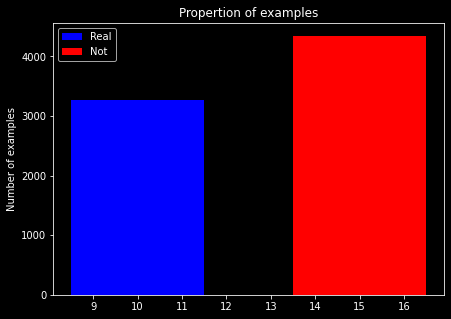

In [9]:
# class dist
# extracting the number of examples of each class
Real_len = train[train['target'] == 1].shape[0]
Not_len = train[train['target'] == 0].shape[0]
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


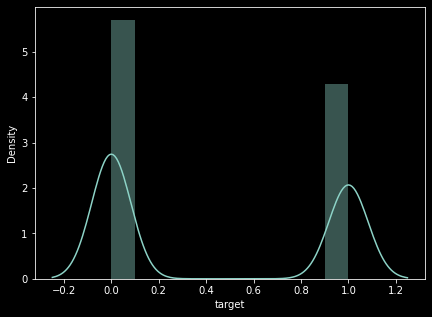

In [10]:
import seaborn as sns
sns.distplot(train.target)

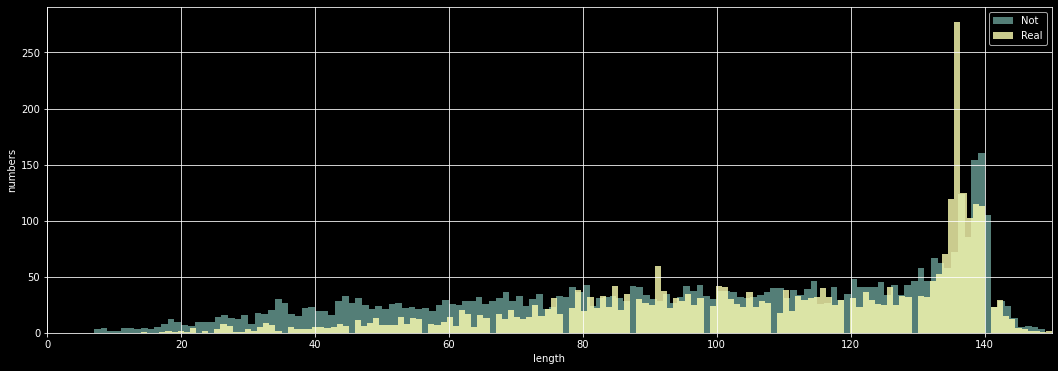

In [11]:
#length of tweet
train['length'] = train['text'].apply(len)
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(train[train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train[train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

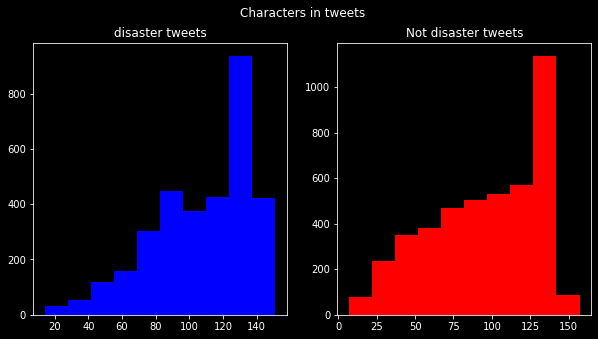

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


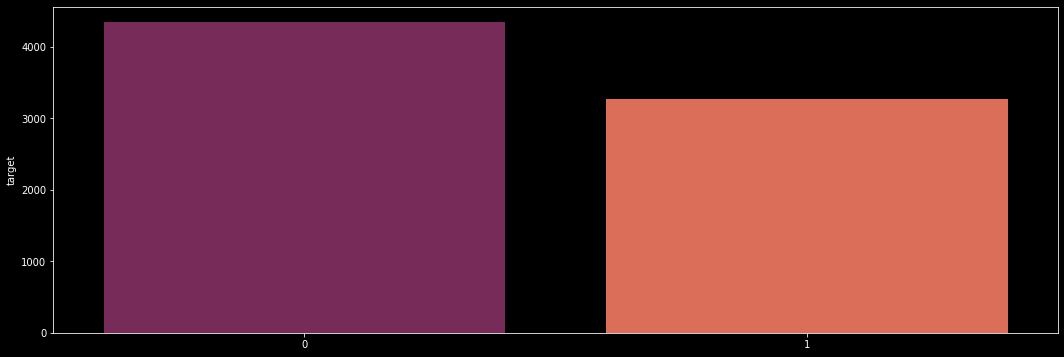

In [13]:
sns.barplot(train['target'].value_counts().index,train['target'].value_counts(),palette='rocket')

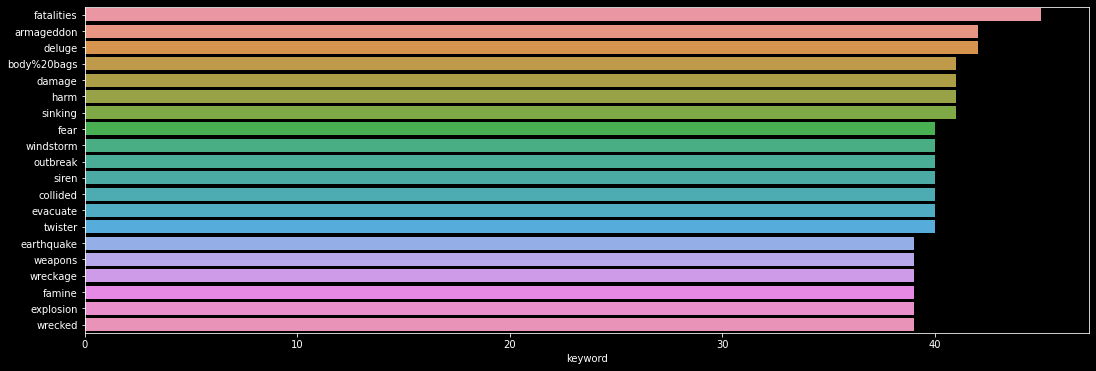

In [14]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],orient='h')

In [15]:
df=pd.concat([train,test])
df.shape

(10876, 6)

In [16]:
# remove urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# remove html tags
def remove_HTML(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

# remove hashtags
def remove_hashtags(text):
    hasht = re.compile(r'https?://\S+|www\.\S+')
    return hasht.sub(r'',text)

# remove all at once
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def clean_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [17]:
df['text']=df['text'].apply(lambda x: clean_text(x))
df['text']=df['text'].apply(lambda x: clean_emoji(x))

In [18]:
# some helper functions   
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

### Wordcloud

In [19]:
# REAL
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

44271

In [20]:
# NOT REAL
corpus_new0=create_corpus_df(df,0)
len(corpus_new0)

58583

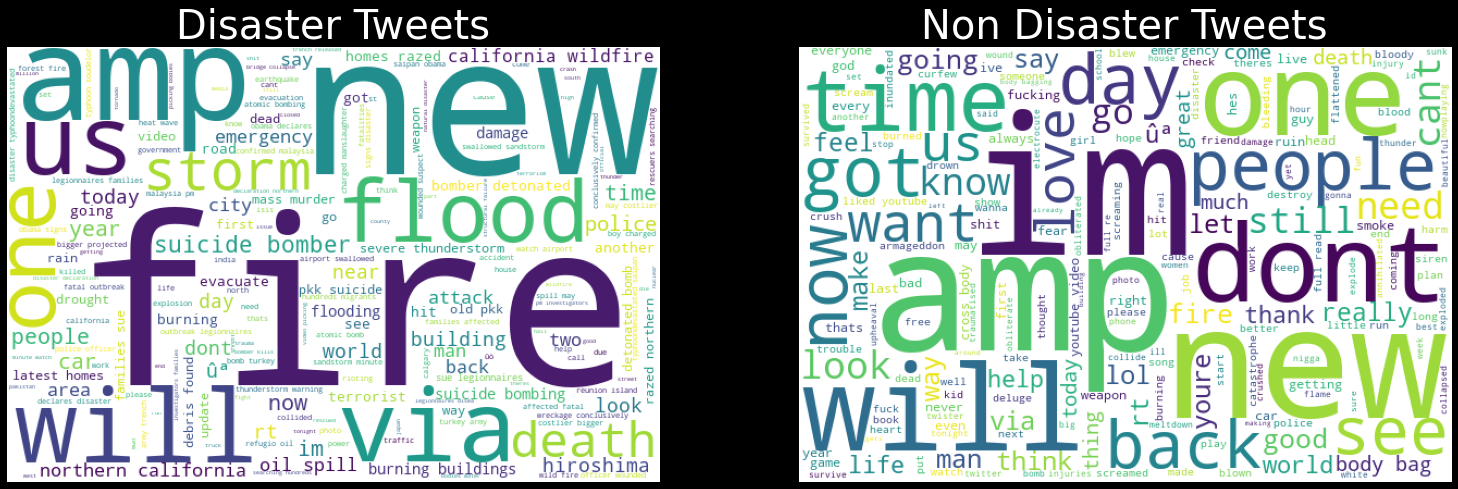

In [21]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(corpus_new1))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(corpus_new0))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [22]:
def create_corpus_tokenized(df, tokenizer_obj):
    corpus=[]
    for tw in tqdm(df['text']):
        words=[word.lower() for word in tokenizer_obj.tokenize(tw)]
        corpus.append(words)
    return corpus   

In [23]:
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1.0,69.0
1,4,NaN,NaN,forest fire near la ronge sask canada,1.0,38.0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1.0,133.0
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1.0,65.0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1.0,88.0


In [24]:
tweet_tokenizer = nltk.tokenize.TweetTokenizer()
corpus = create_corpus_tokenized(df, tweet_tokenizer)

100%|██████████| 10876/10876 [00:00<00:00, 20986.44it/s]


In [25]:
corpus[0]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all']

In [26]:
# fasttext
embedding_dict={}
with open('./glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

print('found %s word vectors' % len(embedding_dict))

found 400000 word vectors


In [27]:
embedding_dict[word].shape

(100,)

In [28]:
num_words = len(embedding_dict)

In [29]:

MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [30]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 20840


In [31]:
# get the embedding vectors for the words
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec          

100%|██████████| 20840/20840 [00:00<00:00, 591402.54it/s]


# Baseline Model with GloVe results

In [32]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

optimzer=Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           2084100   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,164,601
Trainable params: 80,501
Non-trainable params: 2,084,100
_________________________________________________________________


In [33]:
train_tweet = tweet_pad[: train.shape[0]]
test_tweet = tweet_pad[train.shape[0]:]

In [34]:
train_tweet.shape

(7613, 50)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
X_train,X_test,y_train,y_test=train_test_split(train_tweet,train['target'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6090, 50)
Shape of Validation  (1523, 50)


In [52]:
report = model.fit(X_train, 
                   y_train,
                   batch_size=4,
                   epochs=10,
                   validation_data=(X_test, y_test),
                   verbose=2)

Epoch 1/10
1523/1523 - 258s - loss: 0.5163 - accuracy: 0.7675 - val_loss: 0.4551 - val_accuracy: 0.8024
Epoch 2/10
1523/1523 - 255s - loss: 0.4883 - accuracy: 0.7810 - val_loss: 0.4780 - val_accuracy: 0.8056
Epoch 3/10
1523/1523 - 255s - loss: 0.4737 - accuracy: 0.7934 - val_loss: 0.4397 - val_accuracy: 0.8122
Epoch 4/10
1523/1523 - 255s - loss: 0.4648 - accuracy: 0.7956 - val_loss: 0.4555 - val_accuracy: 0.8102
Epoch 5/10


KeyboardInterrupt: ignored

# Predict

In [54]:
train_pred_GloVe = model.predict(X_train)
train_pred_GloVe_int = train_pred_GloVe.round().astype('int')

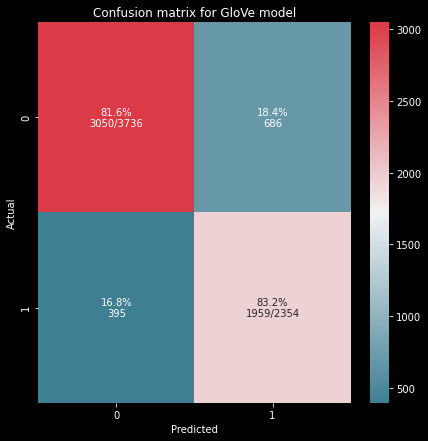

In [68]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(cm, cmap= colormap, annot=annot, fmt='', ax=ax)
    #sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
# Showing Confusion Matrix for GloVe model
plot_cm(train_pred_GloVe_int, y_train, 'Confusion matrix for GloVe model', figsize=(7,7))

## Submission

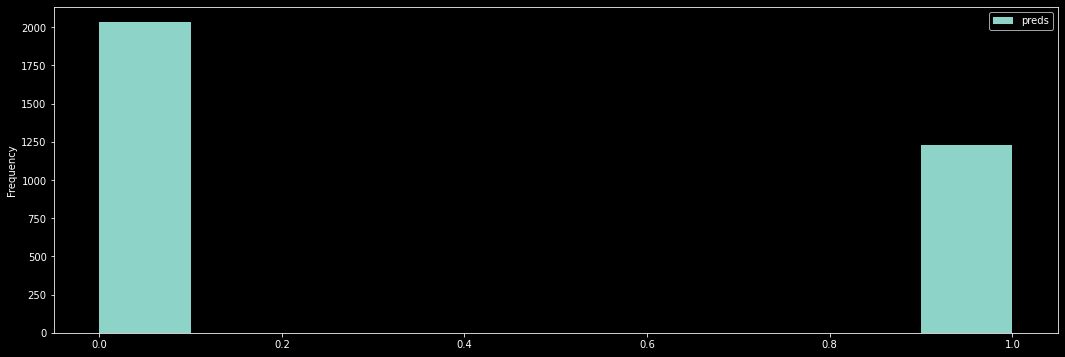

In [73]:
test_pred_GloVe = model.predict(test_tweet)
test_pred_GloVe_int = test_pred_GloVe.round().astype('int')
test_pred = pd.DataFrame(test_pred_GloVe_int, columns=['preds'])
test_pred.plot.hist()

In [78]:
! wget https://raw.githubusercontent.com/muthu1698/Real-or-Not-NLP-with-Disaster-Tweets/master/sample_submission.csv
submission = pd.read_csv("./sample_submission.csv")
submission['target'] = test_pred_GloVe_int
submission.head(10)

--2020-12-03 03:34:18--  https://raw.githubusercontent.com/muthu1698/Real-or-Not-NLP-with-Disaster-Tweets/master/sample_submission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22746 (22K) [text/plain]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[===================>]  22.21K  --.-KB/s    in 0s      

2020-12-03 03:34:18 (82.7 MB/s) - ‘sample_submission.csv’ saved [22746/22746]



,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


# Trax Implementation

In [51]:
from trax import layers as tl
from trax import data

In [ ]:
def data_generator(data_pos, data_neg, batch_size, loop, vocab_dict, shuffle=False):
    '''
    Input: 
        data_pos - Set of positive examples
        data_neg - Set of negative examples
        batch_size - number of samples per batch. Must be even
        loop - True or False
        vocab_dict - The words dictionary
        shuffle - Shuffle the data order
    Yield:
        inputs - Subset of positive and negative examples
        targets - The corresponding labels for the subset
        example_weights - An array specifying the importance of each example
        
    '''     
    # make sure the batch size is an even number
    # to allow an equal number of positive and negative samples
    assert batch_size % 2 == 0
    # Number of positive examples in each batch is half of the batch size
    # same with number of negative examples in each batch
    n_to_take = batch_size // 2
    # Use pos_index to walk through the data_pos array
    # same with neg_index and data_neg
    pos_index = 0
    neg_index = 0
    len_data_pos = len(data_pos)
    len_data_neg = len(data_neg)
    # Get and array with the data indexes
    pos_index_lines = list(range(len_data_pos))
    neg_index_lines = list(range(len_data_neg))
    # shuffle lines if shuffle is set to True
    if shuffle:
        rnd.shuffle(pos_index_lines)
        rnd.shuffle(neg_index_lines)
        
    stop = False
    
    # Loop indefinitely
    while not stop:  
        # create a batch with positive and negative examples
        batch = []
        # First part: Pack n_to_take positive examples
        # Start from pos_index and increment i up to n_to_take
        for i in range(n_to_take):
            # If the positive index goes st the positive dataset lenght,
            if pos_index >= len_data_pos: 
                # If loop is set to False, break once we reach the end of the dataset
                if not loop:
                    stop = True;
                    break;
                # If user wants to keep re-using the data, reset the index
                pos_index = 0
                if shuffle:
                    # Shuffle the index of the positive sample
                    rnd.shuffle(pos_index_lines)
            # get the tweet as pos_index
            tweet = data_pos[pos_index_lines[pos_index]]
            # convert the tweet into tensors of integers representing the processed words
            tensor = tweet_to_tensor(tweet, vocab_dict)
            # append the tensor to the batch list
            batch.append(tensor)
            # Increment pos_index by one
            pos_index = pos_index + 1

        # Second part: Pack n_to_take negative examples
    
        # Using the same batch list, start from neg_index and increment i up to n_to_take
        for i in range(n_to_take):
            # If the negative index goes past the negative dataset length,
            if neg_index >= len_data_neg:
                # If loop is set to False, break once we reach the end of the dataset
                if not loop:
                    stop = True;
                    break;
                # If user wants to keep re-using the data, reset the index
                neg_index = 0
                if shuffle:
                    # Shuffle the index of the negative sample
                    rnd.shuffle(neg_index_lines)
            # get the tweet as neg_index
            tweet = data_neg[neg_index_lines[neg_index]]
            # convert the tweet into tensors of integers representing the processed words
            tensor = tweet_to_tensor(tweet, vocab_dict)
            # append the tensor to the batch list
            batch.append(tensor)
            # Increment neg_index by one
            neg_index += 1
        if stop:
            break;
        # Update the start index for positive data 
        # so that it's n_to_take positions after the current pos_index
        pos_index += n_to_take
        # Update the start index for negative data 
        # so that it's n_to_take positions after the current neg_index
        neg_index += n_to_take
        # Get the max tweet length (the length of the longest tweet) 
        # (you will pad all shorter tweets to have this length)
        max_len = max([len(t) for t in batch]) 
        # Initialize the input_l, which will 
        # store the padded versions of the tensors
        tensor_pad_l = []
        # Pad shorter tweets with zeros
        for tensor in batch:
            # Get the number of positions to pad for this tensor so that it will be max_len long
            n_pad = max_len - len(tensor)

            # Generate a list of zeros, with length n_pad
            pad_l = [0] * n_pad
            
            # concatenate the tensor and the list of padded zeros
            tensor_pad = tensor + pad_l
            
            # append the padded tensor to the list of padded tensors
            tensor_pad_l.append(tensor_pad)

        # convert the list of padded tensors to a numpy array
        # and store this as the model inputs
        inputs = np.array(tensor_pad_l)
  
        # Generate the list of targets for the positive examples (a list of ones)
        # The length is the number of positive examples in the batch
        target_pos = [1] * n_to_take
        
        # Generate the list of targets for the negative examples (a list of zeros)
        # The length is the number of negative examples in the batch
        target_neg = [0] * n_to_take
        
        # Concatenate the positve and negative targets
        target_l = target_pos + target_neg
        
        # Convert the target list into a numpy array
        targets = np.array(target_l)

        # Example weights: Treat all examples equally importantly.It should return an np.array. Hint: Use np.ones_like()
        example_weights = np.ones_like(targets)
        
        # note we use yield and not return
        yield inputs, targets, example_weights

In [ ]:
y_train

In [ ]:
# Set the random number generator for the shuffle procedure
rnd.seed(30) 

# Create the training data generator
def train_generator(batch_size, shuffle = False):
    return data_generator(train_pos, train_neg, batch_size, True, Vocab, shuffle)

# Create the validation data generator
def val_generator(batch_size, shuffle = False):
    return data_generator(val_pos, val_neg, batch_size, True, Vocab, shuffle)

# Create the validation data generator
def test_generator(batch_size, shuffle = False):
    return data_generator(val_pos, val_neg, batch_size, False, Vocab, shuffle)

# Get a batch from the train_generator and inspect.
inputs, targets, example_weights = next(train_generator(4, shuffle=True))

# this will print a list of 4 tensors padded with zeros
print(f'Inputs: {inputs}')
print(f'Targets: {targets}')
print(f'Example Weights: {example_weights}')

In [45]:
train_mode = True

trax_model = tl.Serial(
        tl.Embedding(vocab_size=num_words, d_feature=100, kernel_initializer=Constant(embedding_matrix)),
        tl.Dropout(rate=0.2, mode=train_mode),
        tl.LSTM(100),
        tl.Dense(1),
        tl.Sigmoid()
)
print(trax_model)

Serial[
  Embedding_20841_100
  Dropout
  LSTM_100
  Dense_1
  Sigmoid
]


In [ ]:
gen = tf.keras.preprocessing.image.ImageDataGenerator()
res = gen.flow(images, labels)


train_batches_stream = data.Serial(

)

In [49]:
from trax.supervised import training

# Training task.
train_task = training.TrainTask(
    labeled_data=train_batches_stream,
    loss_layer=tl.CrossEntropyLoss(),
    optimizer=trax.optimizers.Adam(0.01),
    n_steps_per_checkpoint=500,
)

# Evaluaton task.
eval_task = training.EvalTask(
    labeled_data=eval_batches_stream,
    metrics=[tl.CrossEntropyLoss(), tl.Accuracy()],
    n_eval_batches=20  # For less variance in eval numbers.
)

# Training loop saves checkpoints to output_dir.
output_dir = os.path.expanduser('~/output_dir/')
!rm -rf {output_dir}
training_loop = training.Loop(trax_model,
                              train_task,
                              eval_tasks=[eval_task],
                              output_dir=output_dir)

# Run 2000 steps (batches).
training_loop.run(2000)

LayerError: ignored